In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



# analysis

In [4]:
datasetName = '/stor/public/hcad/Vessel_Artery_HCLAdultArtery1/Vessel_Artery_HCLAdultArtery1'

In [5]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv"),header = TRUE, sep='\t',row.names = 1)

In [6]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [7]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [8]:
dataobj

An object of class Seurat 
24573 features across 9652 samples within 1 assay 
Active assay: RNA (24573 features, 0 variable features)

In [9]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



In [10]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  DCN, MGP, COL1A2, CXCL14, GSN, MFAP5, APOD, IGFBP5, LUM, MT1X 
	   PLA2G2A, SLPI, IFITM3, C7, TIMP1, CXCL12, FN1, PI16, MT1M, COL3A1 
	   CRYAB, RPS27, SERPINA3, PTGDS, SFRP4, TAGLN, COL1A1, RPL34, MT1A, MYOC 
Negative:  CCL3, CXCL8, HLA-DRA, CCL4, C1QB, FCER1G, BCL2A1, SAT1, LAPTM5, CD74 
	   LYZ, TYROBP, FTL, CTSS, HLA-DRB1, CD163, CTSB, HLA-DQA1, CCL4L2, RGS1 
	   FTH1, C1QA, SRGN, C1QC, FCGR2A, GPR183, HLA-DPB1, HLA-DQB1, SOD2, CTSD 
PC_ 2 
Positive:  TM4SF1, SELE, ACKR1, ADAMTS9, S1PR1, PLVAP, PCAT19, ADGRL4, AQP1, STC1 
	   CD93, GJA1, SOX7, PECAM1, ESAM, PNP, CALCRL, ANGPT2, CNKSR3, FABP4 
	   C2CD4B, IL6, DUSP6, TSC22D1, CSF3, SERPINE1, MCTP1, RND1, FLT1, CLEC2B 
Negative:  DCN, MGP, MFAP5, IGFBP5, COL1A2, S100A4, GSN, CXCL14, APOD, FN1 
	   LUM, PLA2G2A, SLPI, TIMP1, GPNMB, PI16, SFRP4, CRYAB, COL3A1, FTL 
	   CXCL12, COL1A1, PTGDS, LTBP2, SERPINA3, MYOC, MT1X, MT1M, ITGBL1, THBS2 
PC_ 3 
Positive:  TMSB4X, MT-CO1, APOE, MT-ATP6, TMSB10, ACP5, MT-ND4, MT-CO2,

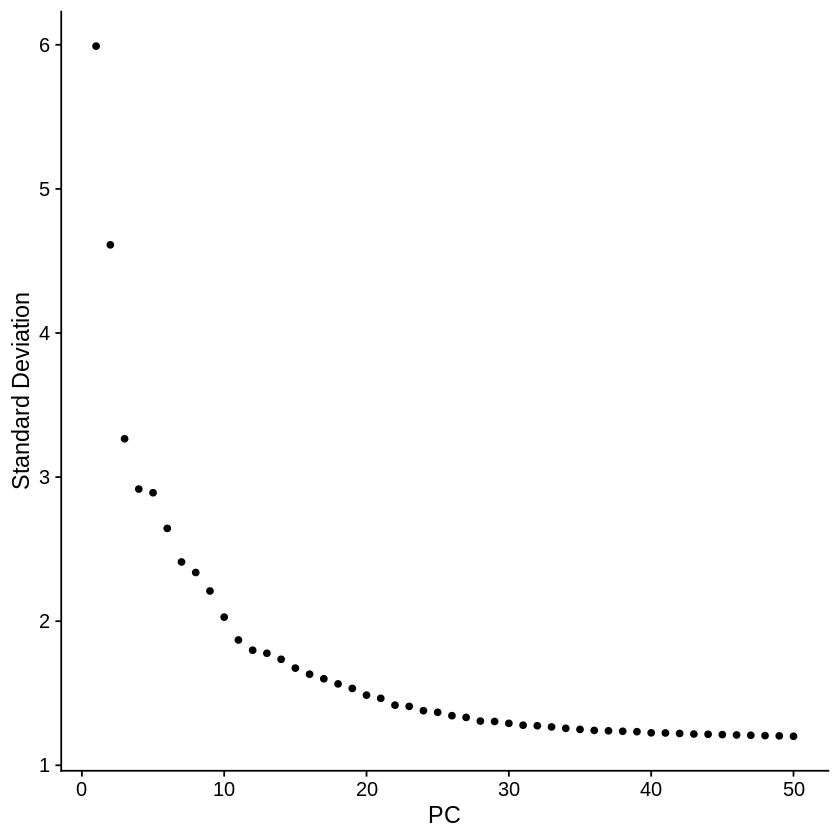

In [11]:
ElbowPlot(dataobj,50) 

In [12]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:38:28 UMAP embedding parameters a = 0.9922 b = 1.112

10:38:28 Read 9652 rows and found 30 numeric columns

10:38:28 Using Annoy for neighbor search, n_neighbors = 30

10:38:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

10:38:31 Writing NN index file to temp file /tmp/RtmpLHYhmt/file4b8a3146851d

10:38:31 Searching Annoy index using 1 thread, search_k = 3000

10:38:34 Annoy recall = 100%

10:38:34 Commencing smooth kNN distance calibration using 1 thread

10:38:35 Initializing fr

In [13]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


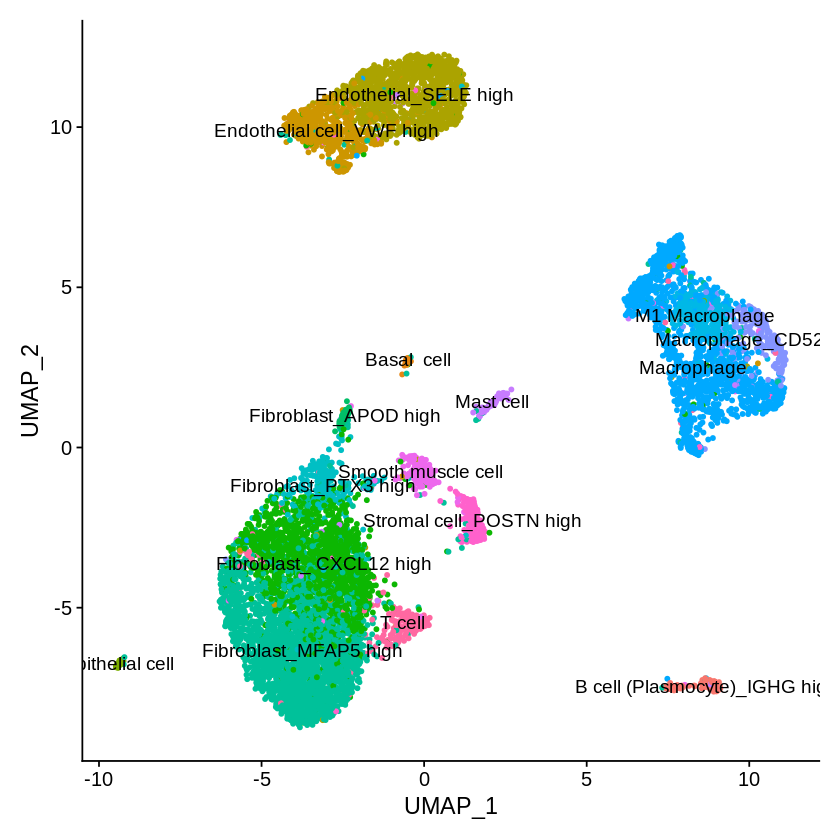

In [14]:
p_umap2

In [86]:
table(dataobj@meta.data$cell_cluster)


B cell (Plasmocyte)_IGHG high                   Basal  cell 
                          154                            33 
    Endothelial cell_VWF high         Endothelial_SELE high 
                          604                          1175 
              Epithelial cell       Fibroblast_ CXCL12 high 
                           42                          1708 
         Fibroblast_APOD high         Fibroblast_MFAP5 high 
                           91                          2730 
         Fibroblast_PTX3 high                 M1 Macrophage 
                          282                           355 
                   Macrophage          Macrophage_CD52 high 
                         1459                           226 
                    Mast cell            Smooth muscle cell 
                          140                           209 
      Stromal cell_POSTN high                        T cell 
                          209                           235 

# Clustering

In [15]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [18]:
dataobj <- FindClusters(dataobj, resolution = 1, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9652
Number of edges: 366561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 17
Elapsed time: 1 seconds


In [20]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

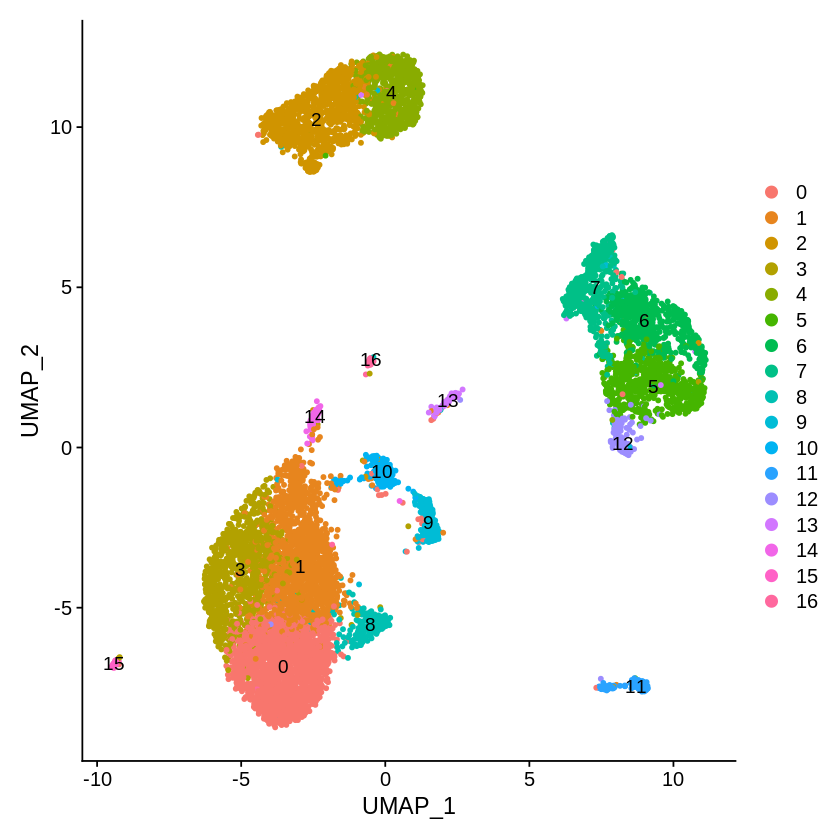

In [21]:
p_umap

# Finding cluster markers 

In [22]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16



# Annotation

In [94]:
dataobj.markers[dataobj.markers['cluster']==16,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
KRT6A,0,3.314090,0.833,0.004,0,16,KRT6A
KRT17,0,3.108596,0.722,0.009,0,16,KRT17
KRT5,0,2.761546,0.694,0.002,0,16,KRT5
FXYD3,0,2.603197,0.667,0.002,0,16,FXYD3
SFN,0,2.591427,0.778,0.004,0,16,SFN
KRT191,0,2.526526,0.639,0.006,0,16,KRT19
SPRR1B,0,2.472811,0.444,0.001,0,16,SPRR1B
S100P,0,2.459452,0.583,0.004,0,16,S100P
SERPINB3,0,2.382420,0.472,0.001,0,16,SERPINB3


In [95]:
dataobj.markers[dataobj.markers['gene']=="KRT17",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
KRT17,0,3.108596,0.722,0.009,0,16,KRT17


In [96]:
new.cluster.ids <- c('Vessel-Connective tissue-Fibrocyte-DCN LUM',#0
                    'Vessel-Connective tissue-Fibrocyte-LUM CXCL12',
                    'Vessel-Epithelial tissue-Endothelial cell-ACKR1 VWF',
                    'Vessel-Connective tissue-Fibrocyte-DCN LUM',
                    'Vessel-Epithelial tissue-Endothelial cell-ACKR1 SELE',
                    'Vessel-Connective tissue-Macrophage-FCGR3A C1QB',#5
                    'Vessel-Connective tissue-Macrophage-FCGR3A C1QB',
                    'Vessel-Connective tissue-Macrophage-FCER1G TYROBP',
                    'Vessel-Connective tissue-T cells-CCL5 IL7R',
                    'Vessel-Connective tissue-Stromal cell-NOV POSTN',
                    'Vessel-Muscle tissue-Smooth muscle cell-ACTA2 MYL9',#10
                    'Vessel-Connective tissue-B cells-IGHG1 IGHG3',
                    'Vessel-Connective tissue-Macrophage-FCER1G TYROBP',
                    'Vessel-Connective tissue-Mast cell-TPSAB1 CPA3',
                    'Vessel-Connective tissue-Fibrocyte-FN1 AKR1C1',
                    'Vessel-Epithelial tissue-Perineural epithelial cell-KRT19 SLPI',#15
                    'Vessel-Epithelial tissue-Basal cell-KRT5 KRT17'
                    )

In [103]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

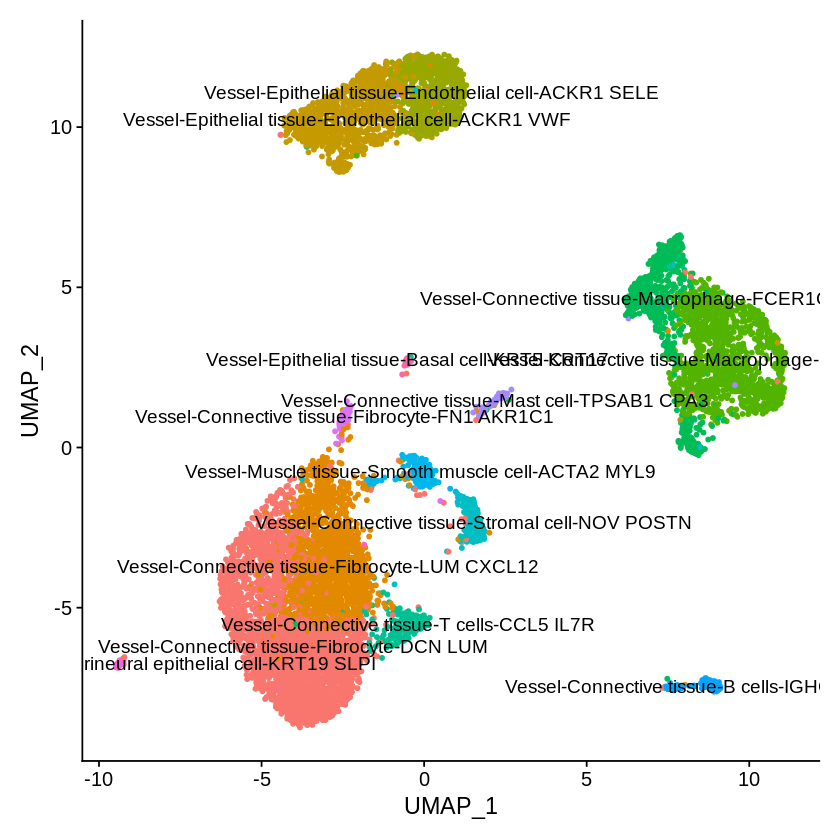

In [98]:
plot

In [99]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = plot, width = 8, height = 5)

In [100]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [104]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [105]:
dataobj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age,cell_cluster,RNA_snn_res.2.5,seurat_clusters,RNA_snn_res.1,hcad.label
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AdultArtery_1.AAAACGAAGCGGACCTGA,AdultArtery,411,339,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Fibroblast_MFAP5 high,1,0,0,Vessel-Connective tissue-Fibrocyte-DCN LUM
AdultArtery_1.AAAACGAAGCGGGCAGGA,AdultArtery,536,426,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Fibroblast_MFAP5 high,0,0,0,Vessel-Connective tissue-Fibrocyte-DCN LUM
AdultArtery_1.AAAACGAAGTACATTTGC,AdultArtery,599,506,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Endothelial_SELE high,5,2,2,Vessel-Epithelial tissue-Endothelial cell-ACKR1 VWF
AdultArtery_1.AAAACGAAGTACTATTGT,AdultArtery,582,333,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Macrophage,15,7,7,Vessel-Connective tissue-Macrophage-FCER1G TYROBP
AdultArtery_1.AAAACGAATAAATAGAGA,AdultArtery,470,330,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Macrophage,8,5,5,Vessel-Connective tissue-Macrophage-FCGR3A C1QB
AdultArtery_1.AAAACGACAATAATTTGC,AdultArtery,697,573,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Fibroblast_ CXCL12 high,4,1,1,Vessel-Connective tissue-Fibrocyte-LUM CXCL12
AdultArtery_1.AAAACGACGTTGAAAGTT,AdultArtery,590,496,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Macrophage_CD52 high,6,6,6,Vessel-Connective tissue-Macrophage-FCGR3A C1QB
AdultArtery_1.AAAACGACGTTGAGGACT,AdultArtery,427,379,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Fibroblast_ CXCL12 high,4,1,1,Vessel-Connective tissue-Fibrocyte-LUM CXCL12
AdultArtery_1.AAAACGAGATGGCTCGCA,AdultArtery,666,497,Vessel,Artery,Ascending aorta,Healthy,AdultArtery1_46Y,Male,46yr,Fibroblast_MFAP5 high,2,1,1,Vessel-Connective tissue-Fibrocyte-LUM CXCL12


In [106]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [107]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [108]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

In [109]:
dataobj

An object of class Seurat 
24573 features across 9652 samples within 1 assay 
Active assay: RNA (24573 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap